<a href="https://colab.research.google.com/github/Deanelle/Patient-Satisfaction-Analysis/blob/main/EDA_HCAHPS_Survey_For_Advent%2C_Pardee%2C_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [ ]:
#importing the data
HCAHP_df=pd.read_csv('/content/data.csv')
HCAHP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Facility ID                            10137 non-null  object 
 1   Facility Name                          10137 non-null  object 
 2   Address                                10137 non-null  object 
 3   City/Town                              10137 non-null  object 
 4   State                                  10137 non-null  object 
 5   ZIP Code                               10137 non-null  int64  
 6   County/Parish                          10137 non-null  object 
 7   Telephone Number                       10137 non-null  object 
 8   HCAHPS Measure ID                      10137 non-null  object 
 9   HCAHPS Question                        10137 non-null  object 
 10  HCAHPS Answer Description              10137 non-null  object 
 11  Pa

In [ ]:
#Lookiing at the first five rows
HCAHP_df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,340001,CAROLINAS MEDICAL CENTER-NORTHEAST,920 CHURCH ST N,CONCORD,NC,28025,CABARRUS,(704) 783-3000,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,75,NaN,Not Applicable,473,NaN,16,NaN,01/01/2023,12/31/2023
1,340001,CAROLINAS MEDICAL CENTER-NORTHEAST,920 CHURCH ST N,CONCORD,NC,28025,CABARRUS,(704) 783-3000,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,6,NaN,Not Applicable,473,NaN,16,NaN,01/01/2023,12/31/2023
2,340001,CAROLINAS MEDICAL CENTER-NORTHEAST,920 CHURCH ST N,CONCORD,NC,28025,CABARRUS,(704) 783-3000,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,19,NaN,Not Applicable,473,NaN,16,NaN,01/01/2023,12/31/2023
3,340001,CAROLINAS MEDICAL CENTER-NORTHEAST,920 CHURCH ST N,CONCORD,NC,28025,CABARRUS,(704) 783-3000,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,90,473,NaN,16,NaN,01/01/2023,12/31/2023
4,340001,CAROLINAS MEDICAL CENTER-NORTHEAST,920 CHURCH ST N,CONCORD,NC,28025,CABARRUS,(704) 783-3000,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,473,NaN,16,NaN,01/01/2023,12/31/2023


In [ ]:
#Looking at only facility name,Pardee.
HCAHP_df.loc[HCAHP_df['Facility Name']=='MARGARET R PARDEE MEMORIAL HOSPITAL']

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
930,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,84,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
931,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,2,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
932,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,14,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
933,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,94,1293,NaN,28,NaN,01/01/2023,12/31/2023
934,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_RECMND_DY,"Patients who reported YES, they would definite...",...,NaN,78,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
1019,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_RECMND_PY,"Patients who reported YES, they would probably...",...,NaN,20,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023
1020,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,NaN,Not Applicable,NaN,92,1293,NaN,28,NaN,01/01/2023,12/31/2023
1021,340017,MARGARET R PARDEE MEMORIAL HOSPITAL,800 N JUSTICE ST,HENDERSONVILLE,NC,28791,HENDERSON,(828) 696-1000,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,NaN,Not Applicable,NaN,Not Applicable,1293,NaN,28,NaN,01/01/2023,12/31/2023


In [ ]:
#Looking at only facility name,Mission
HCAHP_df.loc[HCAHP_df['Facility Name']=='MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGERY CE']

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
93,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,68,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
94,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,8,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
95,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,24,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
96,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,86,505,NaN,21,NaN,01/01/2023,12/31/2023
97,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_RECMND_DY,"Patients who reported YES, they would definite...",...,NaN,49,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
182,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_RECMND_PY,"Patients who reported YES, they would probably...",...,NaN,33,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
183,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,NaN,Not Applicable,NaN,74,505,NaN,21,NaN,01/01/2023,12/31/2023
184,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,NaN,Not Applicable,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023


In [ ]:
#Looking at only facility name,Advent.
HCAHP_df.loc[HCAHP_df['Facility Name']=='ADVENTHEALTH HENDERSONVILLE']

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
1209,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,83,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1210,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,2,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1211,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,15,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1212,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,94,762,NaN,26,NaN,01/01/2023,12/31/2023
1213,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_DY,"Patients who reported YES, they would definite...",...,NaN,86,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1298,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_PY,"Patients who reported YES, they would probably...",...,NaN,12,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1299,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,NaN,Not Applicable,NaN,94,762,NaN,26,NaN,01/01/2023,12/31/2023
1300,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,NaN,Not Applicable,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023


In [ ]:
#creating filtered dataset with just Advent,Mission, and Pardee hospitals
filtered_df = HCAHP_df.loc[
    (HCAHP_df['Facility Name'] == 'ADVENTHEALTH HENDERSONVILLE') |
    (HCAHP_df['Facility Name'] == 'MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGERY CE') |
    (HCAHP_df['Facility Name'] == 'MARGARET R PARDEE MEMORIAL HOSPITAL')
]


In [ ]:
#viewing the first 5 rows
filtered_df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
93,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,68,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
94,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,8,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
95,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,24,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023
96,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,86,505,NaN,21,NaN,01/01/2023,12/31/2023
97,340002,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,(828) 213-1111,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,505,NaN,21,NaN,01/01/2023,12/31/2023


In [ ]:
#viewing the last five rows
filtered_df.tail()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
1297,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_DY,"Patients who reported YES, they would definite...",...,NaN,86,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1298,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_PY,"Patients who reported YES, they would probably...",...,NaN,12,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1299,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,NaN,Not Applicable,NaN,94,762,NaN,26,NaN,01/01/2023,12/31/2023
1300,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,NaN,Not Applicable,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023
1301,340023,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,(828) 684-8501,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,762,NaN,26,NaN,01/01/2023,12/31/2023


In [ ]:
# iterating the columns
for col in filtered_df.columns:
    print(col)

Facility ID
Facility Name
Address
City/Town
State
ZIP Code
County/Parish
Telephone Number
HCAHPS Measure ID
HCAHPS Question
HCAHPS Answer Description
Patient Survey Star Rating
Patient Survey Star Rating Footnote
HCAHPS Answer Percent
HCAHPS Answer Percent Footnote
HCAHPS Linear Mean Value
Number of Completed Surveys
Number of Completed Surveys Footnote
Survey Response Rate Percent
Survey Response Rate Percent Footnote
Start Date
End Date


In [ ]:
#dropping unecessary columns and keeping the mean hospital score:
dropped_cols=['Facility ID','Telephone Number','HCAHPS Measure ID','HCAHPS Answer Description','Patient Survey Star Rating','Patient Survey Star Rating Footnote','HCAHPS Answer Percent','HCAHPS Answer Percent Footnote','Number of Completed Surveys','Number of Completed Surveys Footnote','Survey Response Rate Percent','Survey Response Rate Percent Footnote','Start Date','End Date']
Hospital_Recommended_Score_df=filtered_df.drop(columns=dropped_cols)
Hospital_Recommended_Score_df.head(3)

,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,HCAHPS Question,HCAHPS Linear Mean Value
93,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,"Patients who reported that their nurses ""Alway...",Not Applicable
94,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,"Patients who reported that their nurses ""Somet...",Not Applicable
95,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,"Patients who reported that their nurses ""Usual...",Not Applicable


In [ ]:
Hospital_Recommended_Score_df.tail()

,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,HCAHPS Question,HCAHPS Linear Mean Value
1297,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,"Patients who reported YES, they would definite...",Not Applicable
1298,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,"Patients who reported YES, they would probably...",Not Applicable
1299,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,Recommend hospital - linear mean score,94
1300,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,Recommend hospital - star rating,Not Applicable
1301,ADVENTHEALTH HENDERSONVILLE,100 HOSPITAL DRIVE,HENDERSONVILLE,NC,28792,HENDERSON,Summary star rating,Not Applicable


In [ ]:
# checking for anymore nulls
Hospital_Recommended_Score_df.isnull().sum()

,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
HCAHPS Question,0
HCAHPS Linear Mean Value,0


In [ ]:
#dropping rows with not applicable

# Drop rows where 'Column1' contains 'Not Applicable'
Hospital_Recommended_Score_df= Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'] != 'Not Applicable']

# Reset the index if you want continuous index numbers
Hospital_Recommended_Score_df = Hospital_Recommended_Score_df.reset_index(drop=True)

In [ ]:
#viewing first five rows after dropping not applicable
Hospital_Recommended_Score_df.head()

,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,HCAHPS Question,HCAHPS Linear Mean Value
0,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Nurse communication - linear mean score,86
1,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Doctor communication - linear mean score,87
2,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Staff responsiveness - linear mean score,69
3,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Communication about medicines - linear mean score,67
4,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Discharge information - linear mean score,80


In [ ]:
Hospital_Recommended_Score_df

,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,HCAHPS Question,HCAHPS Linear Mean Value
0,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Nurse communication - linear mean score,86
1,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Doctor communication - linear mean score,87
2,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Staff responsiveness - linear mean score,69
3,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Communication about medicines - linear mean score,67
4,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Discharge information - linear mean score,80
5,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Care transition - linear mean score,75
6,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Cleanliness - linear mean score,69
7,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Quietness - linear mean score,78
8,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Overall hospital rating - linear mean score,77
9,MEMORIAL MISSION HOSPITAL AND ASHEVILLE SURGER...,509 BILTMORE AVE,ASHEVILLE,NC,28801,BUNCOMBE,Recommend hospital - linear mean score,74


In [ ]:
#viewing the data types for the data
Hospital_Recommended_Score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Facility Name             30 non-null     object
 1   Address                   30 non-null     object
 2   City/Town                 30 non-null     object
 3   State                     30 non-null     object
 4   ZIP Code                  30 non-null     int64 
 5   County/Parish             30 non-null     object
 6   HCAHPS Question           30 non-null     object
 7   HCAHPS Linear Mean Value  30 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


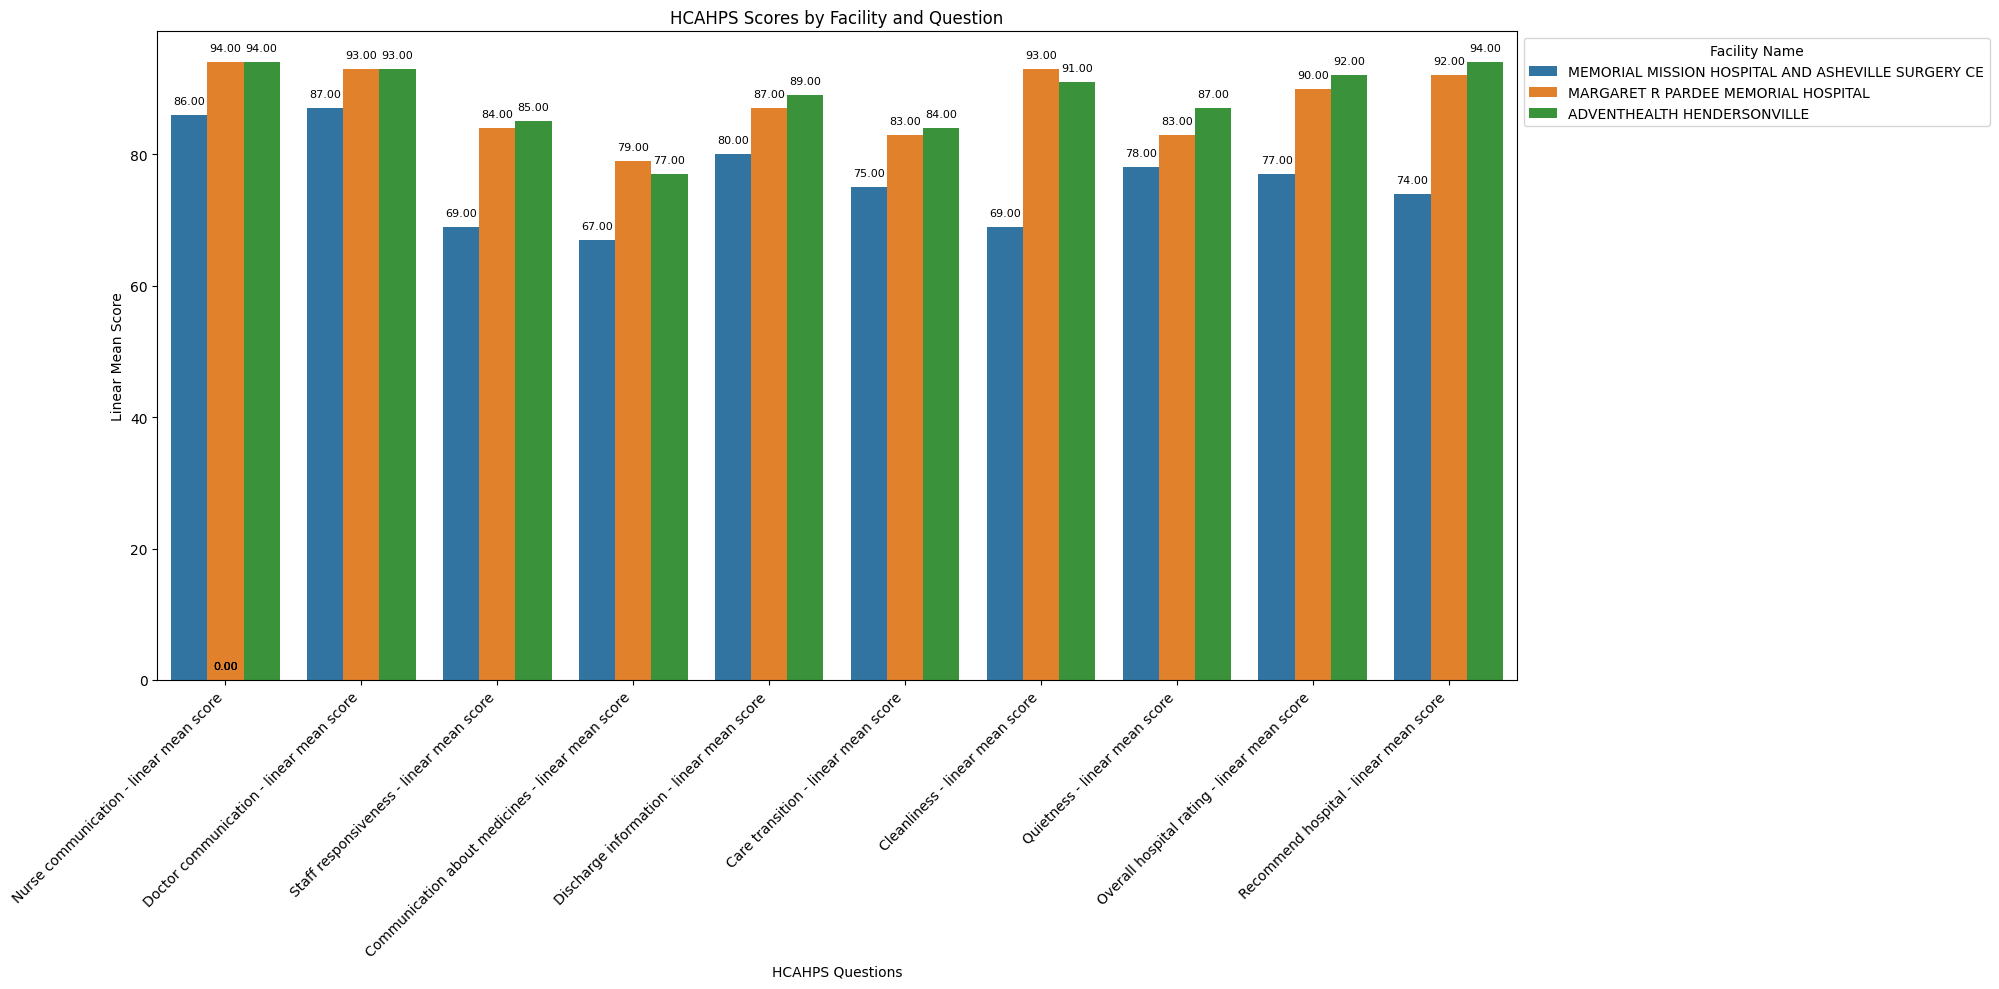

In [ ]:

# Convert 'HCAHPS Linear Mean Value' to numeric
Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'] = pd.to_numeric(Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'], errors='coerce')

# Plotting the bar graph data for all of the hospitals
plt.figure(figsize=(20,10))
sns.barplot(x='HCAHPS Question', y='HCAHPS Linear Mean Value', hue='Facility Name', data=Hospital_Recommended_Score_df)

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('HCAHPS Scores by Facility and Question')
plt.xlabel('HCAHPS Questions')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Facility Name', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


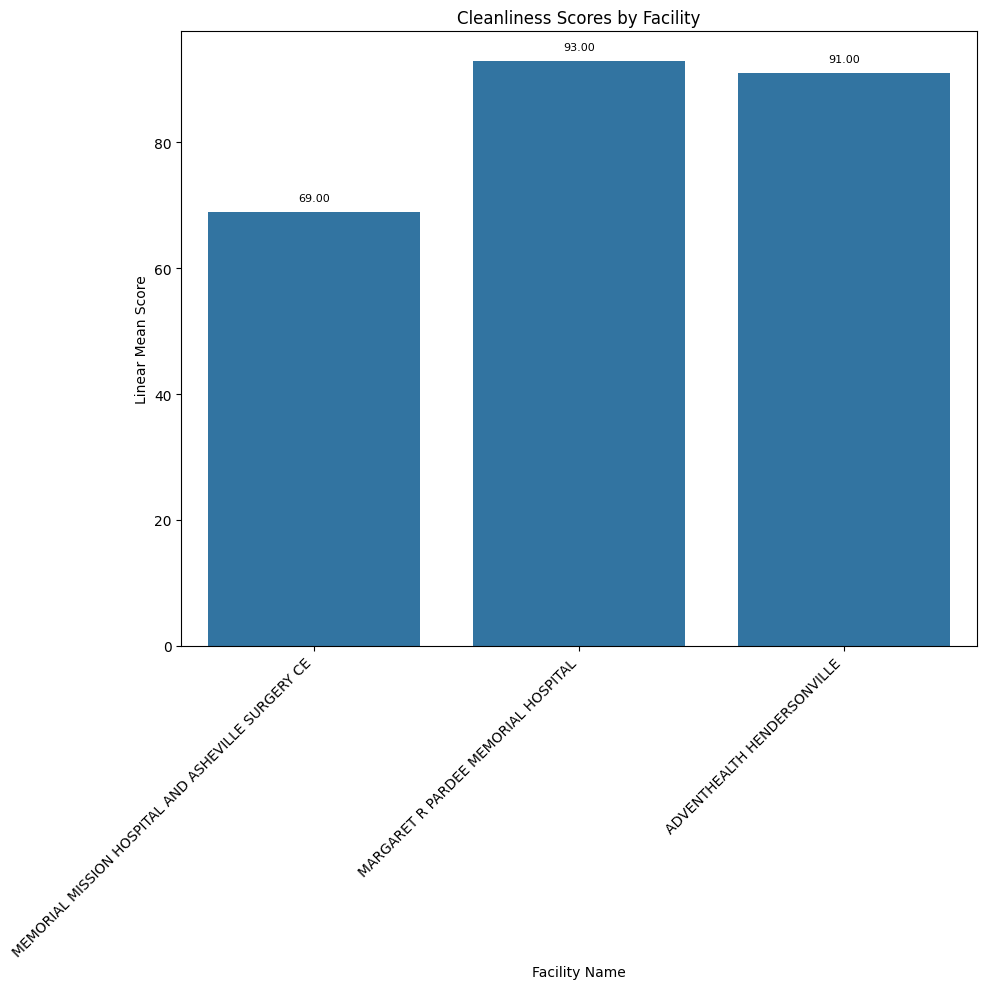

In [ ]:
# Filter the data for cleanliness
cleanliness_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Cleanliness - linear mean score']

# Plotting the bar graph for cleanliness
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=cleanliness_data)
plt.title('Cleanliness Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

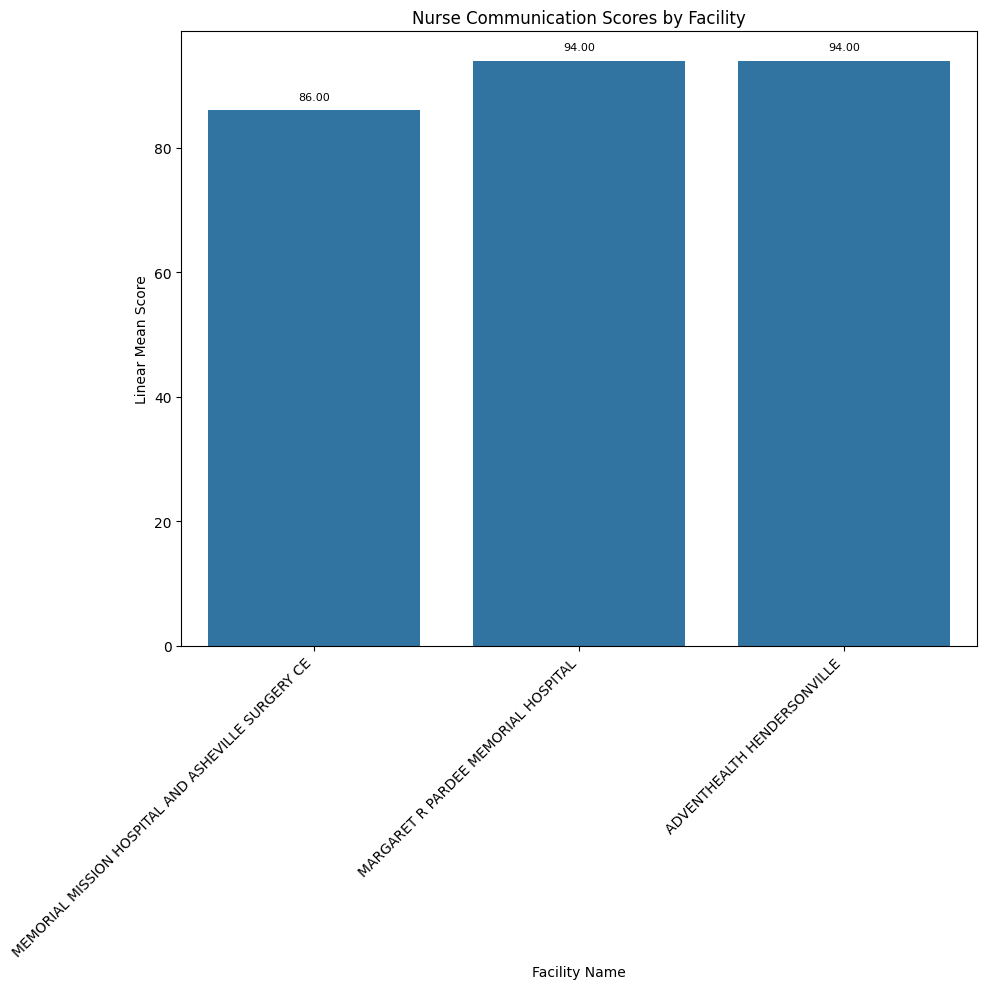

In [ ]:
# Filter the data for Nurse Communication
Nursecommunication_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Nurse communication - linear mean score']

# Plotting the bar graph for Nurse Communication
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Nursecommunication_data)
plt.title('Nurse Communication Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

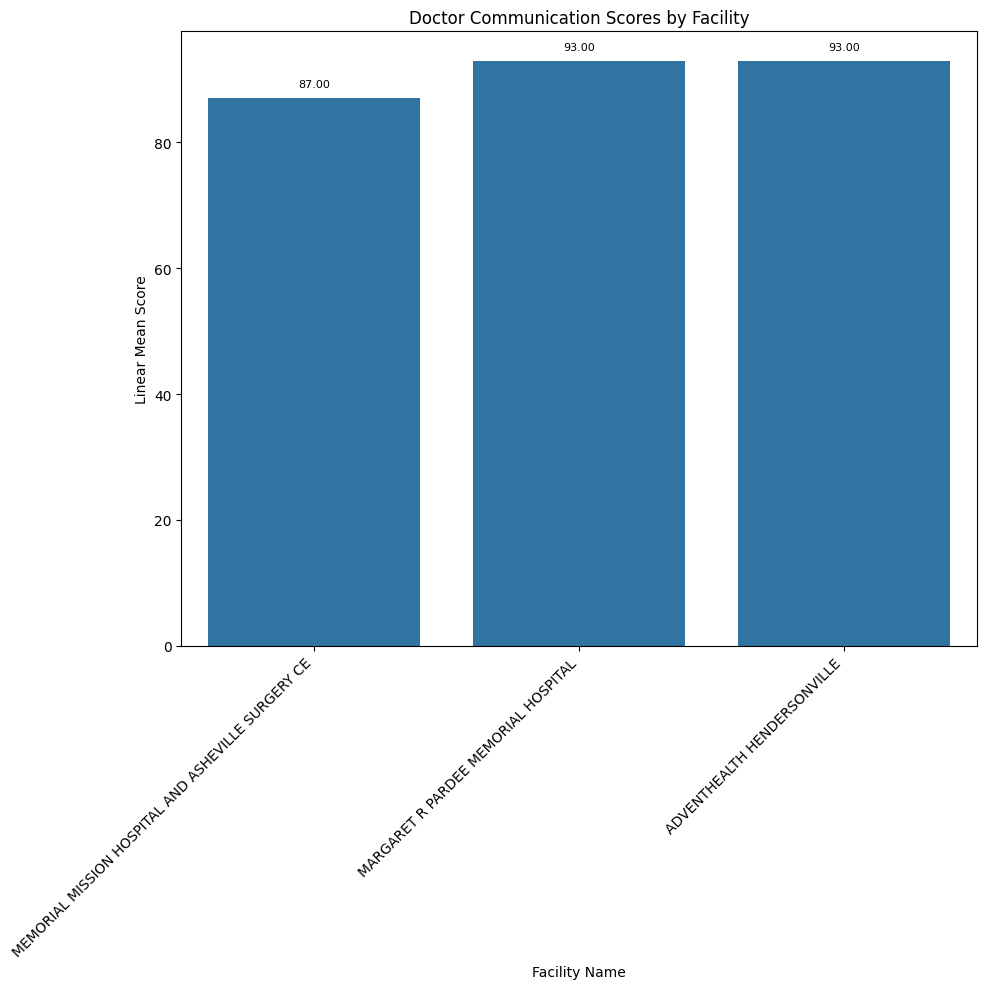

In [ ]:

# Filter the data for Dr. Communication
Doctorcommunication_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Doctor communication - linear mean score']

# Plotting the bar graph for Dr. Communication
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Doctorcommunication_data)
plt.title('Doctor Communication Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

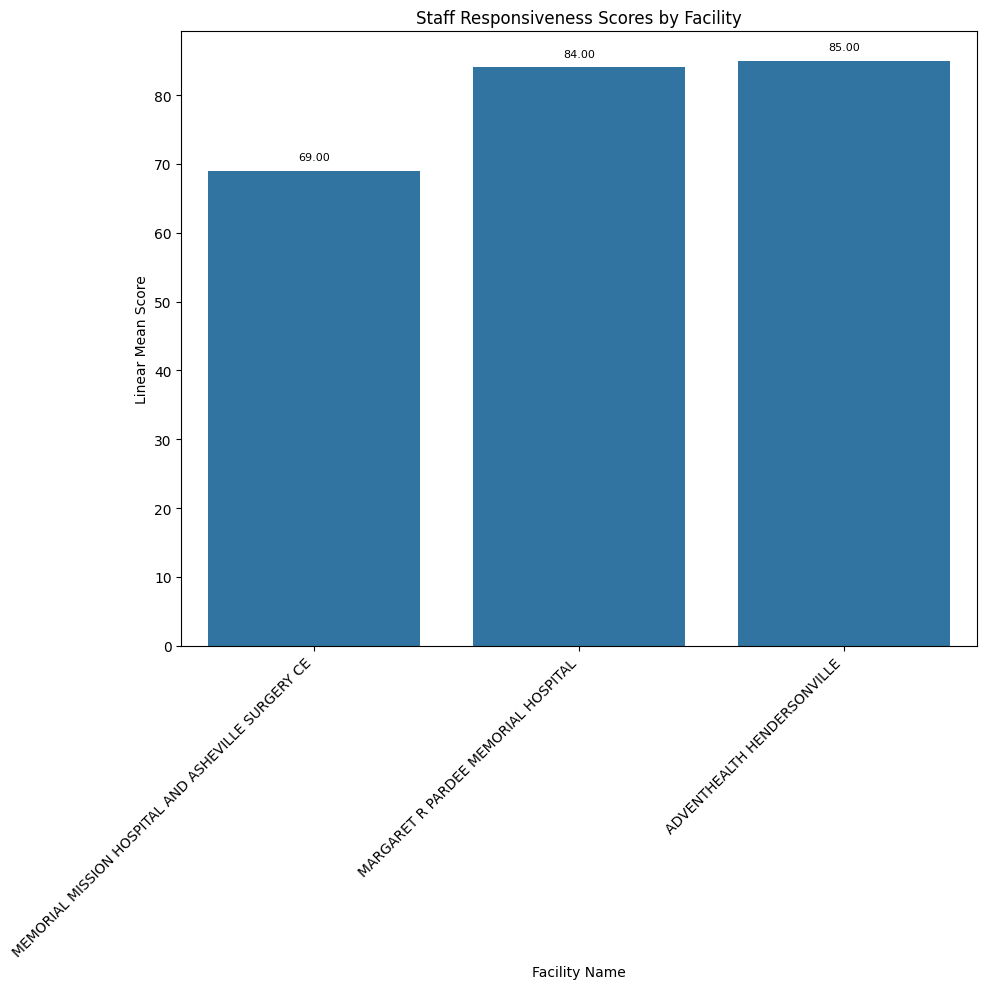

In [ ]:
# Filter the data for staff responsiveness
Staff_Responsiveness_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Staff responsiveness - linear mean score']

# Plotting the bar graph for responsiveness
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Staff_Responsiveness_data)
plt.title('Staff Responsiveness Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

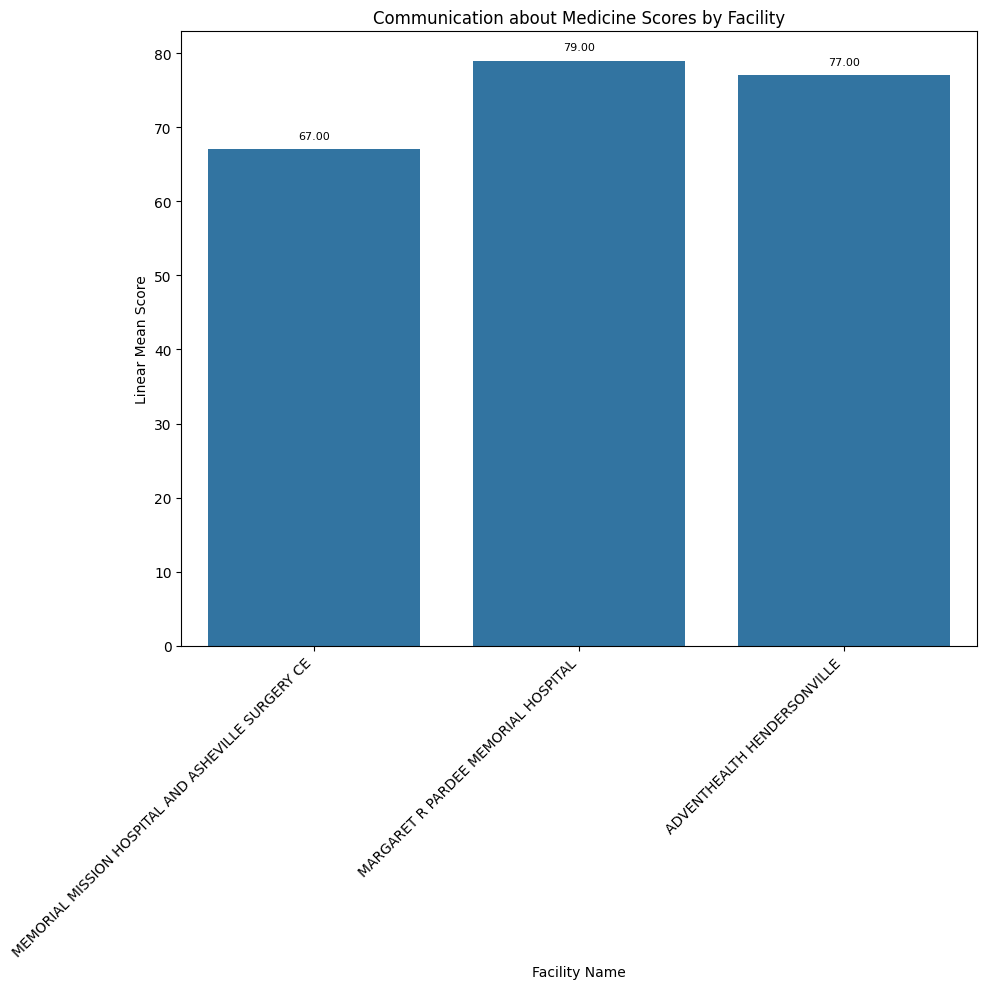

In [ ]:
# Filter the data for Med Communication
Communication_about_meds_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Communication about medicines - linear mean score']

# Plotting the bar graph for Med Communication
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Communication_about_meds_data)
plt.title('Communication about Medicine Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

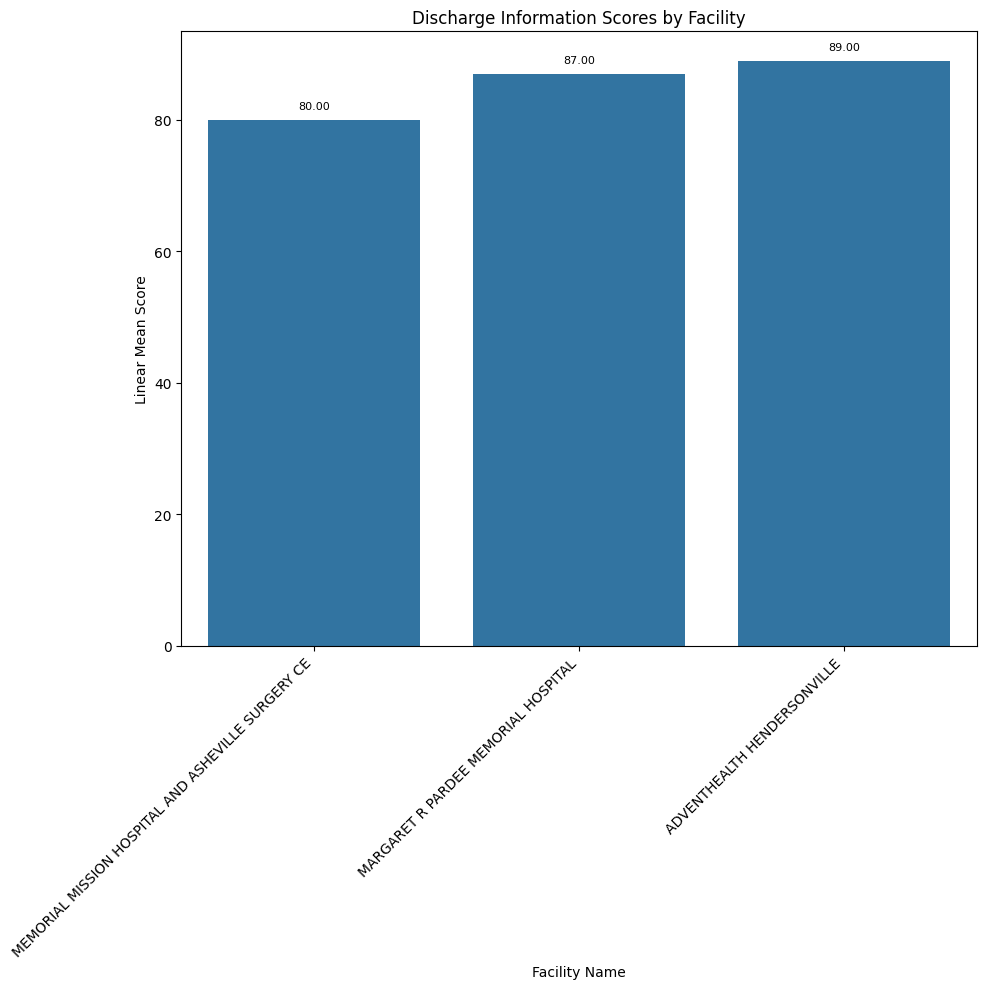

In [ ]:
# Filter the data for Discharge Info
Discharge_Info_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Discharge information - linear mean score']

# Plotting the bar graph for Discharge Info
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Discharge_Info_data)
plt.title('Discharge Information Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

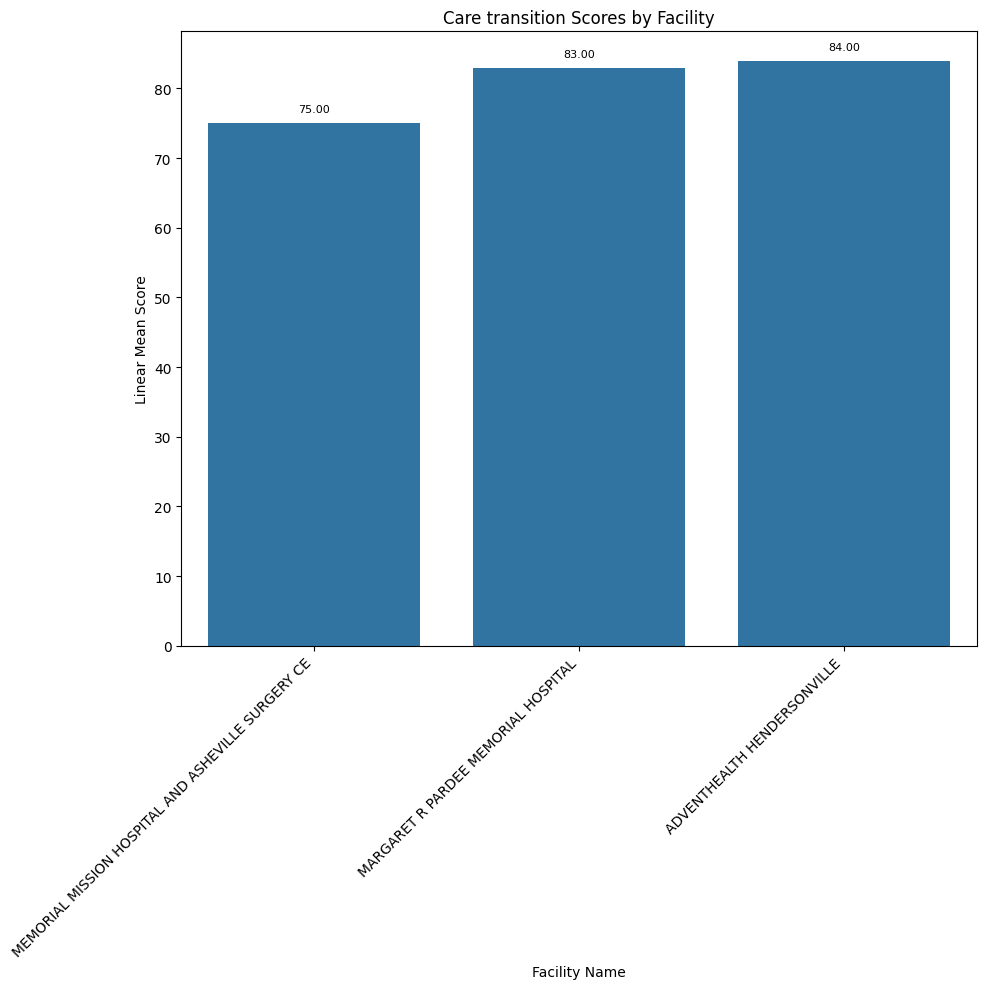

In [ ]:
# Filter the data for Care Transition
Care_transition_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Care transition - linear mean score']

# Plotting the bar graph for Care Transition
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Care_transition_data)
plt.title('Care transition Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

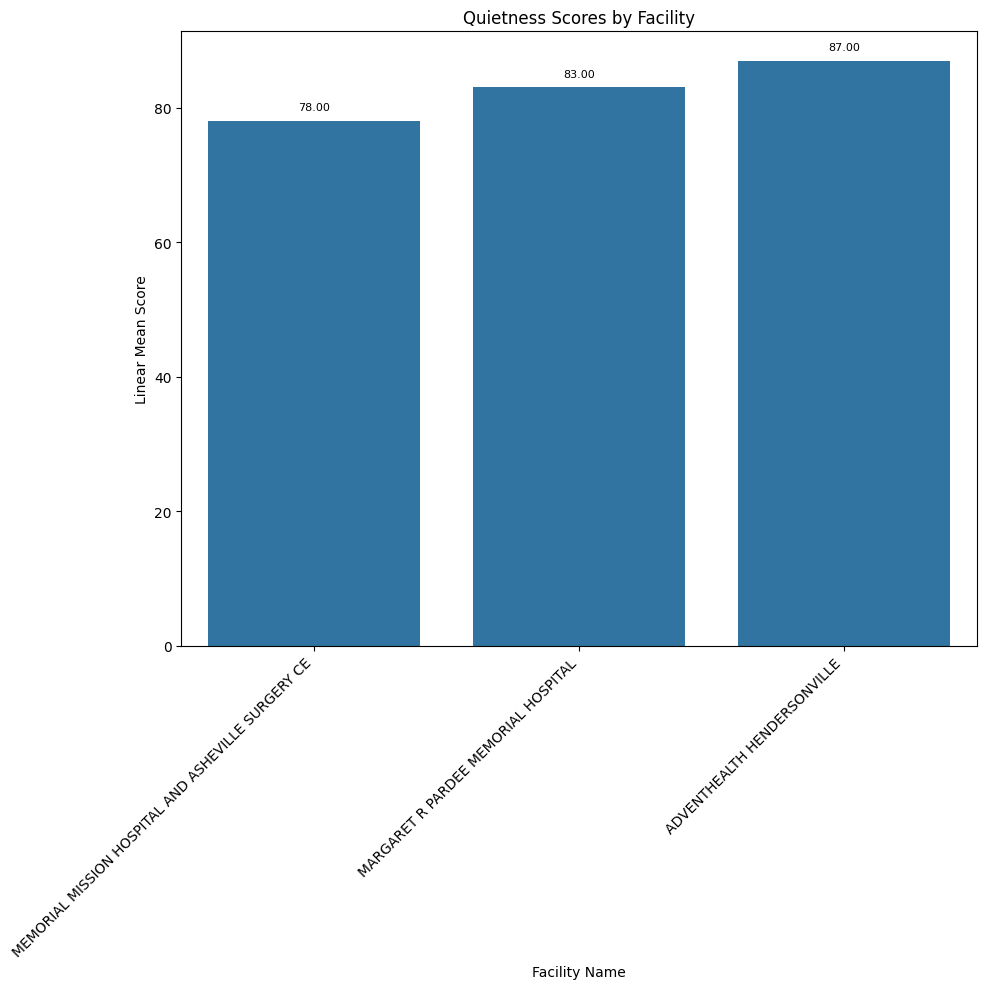

In [ ]:
# Filter the data for  Quietness
Quietness_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Quietness - linear mean score']

# Plotting the bar graph for Quietness
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Quietness_data)
plt.title('Quietness Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

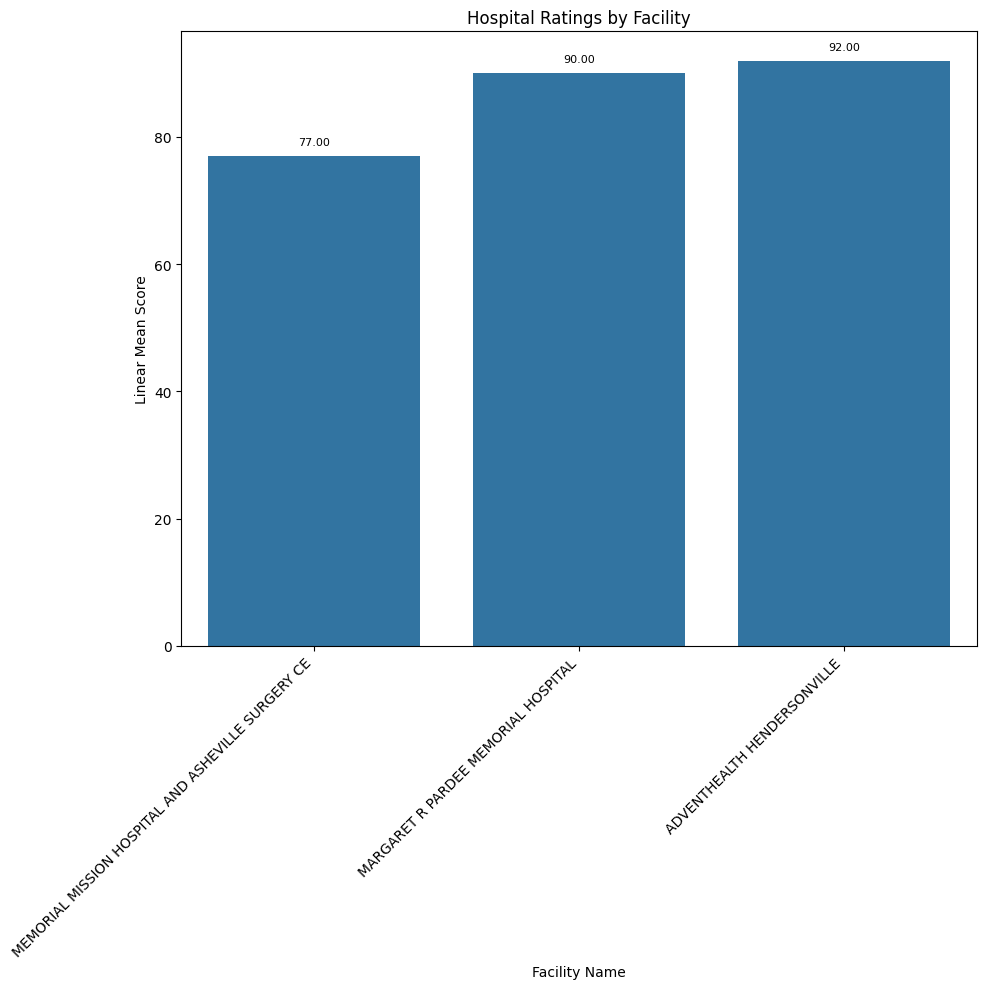

In [ ]:
# Filter the data for Overall rating
Overall_rating_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Overall hospital rating - linear mean score']

# Plotting the bar graph for overall rating
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Overall_rating_data)
plt.title('Hospital Ratings by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

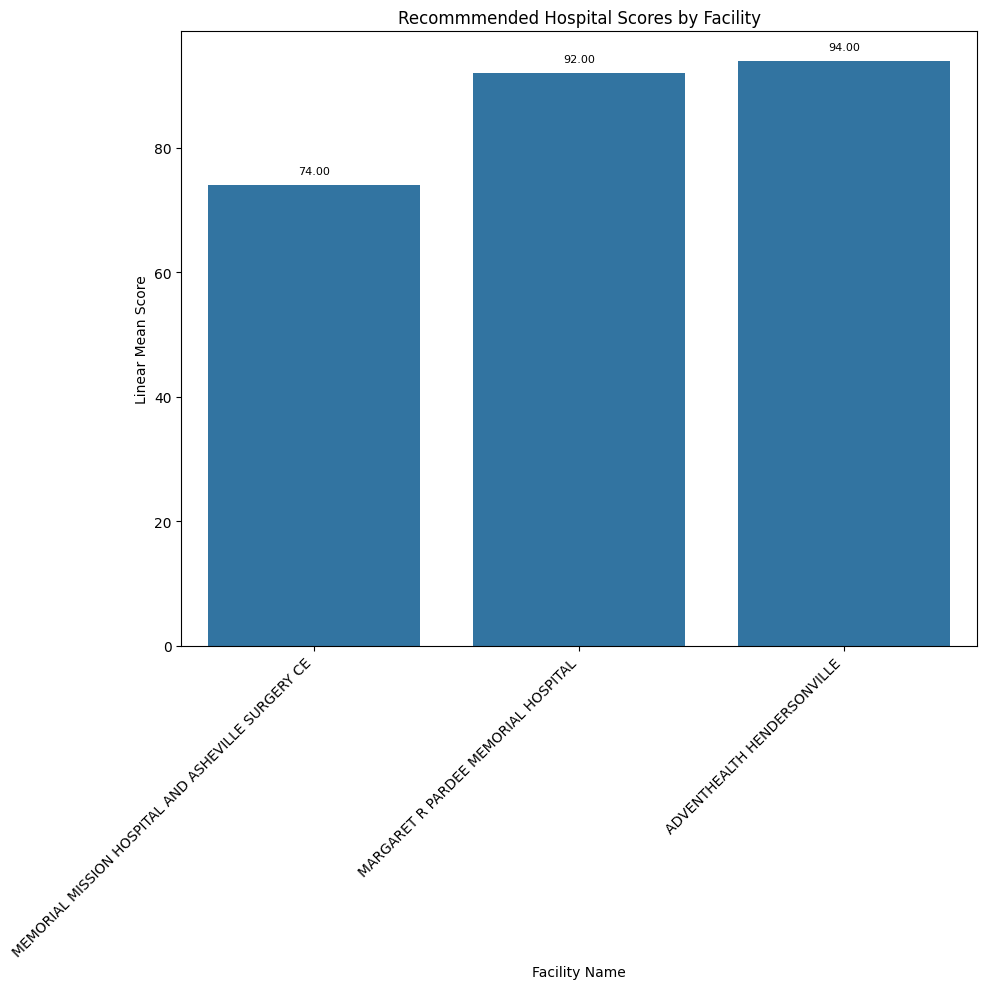

In [ ]:
# Filter the data for recommended score
Recommended_data = Hospital_Recommended_Score_df[Hospital_Recommended_Score_df['HCAHPS Question'] == 'Recommend hospital - linear mean score']

# Plotting the bar graph for recommended score
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Facility Name', y='HCAHPS Linear Mean Value', data=Recommended_data)
plt.title('Recommmended Hospital Scores by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

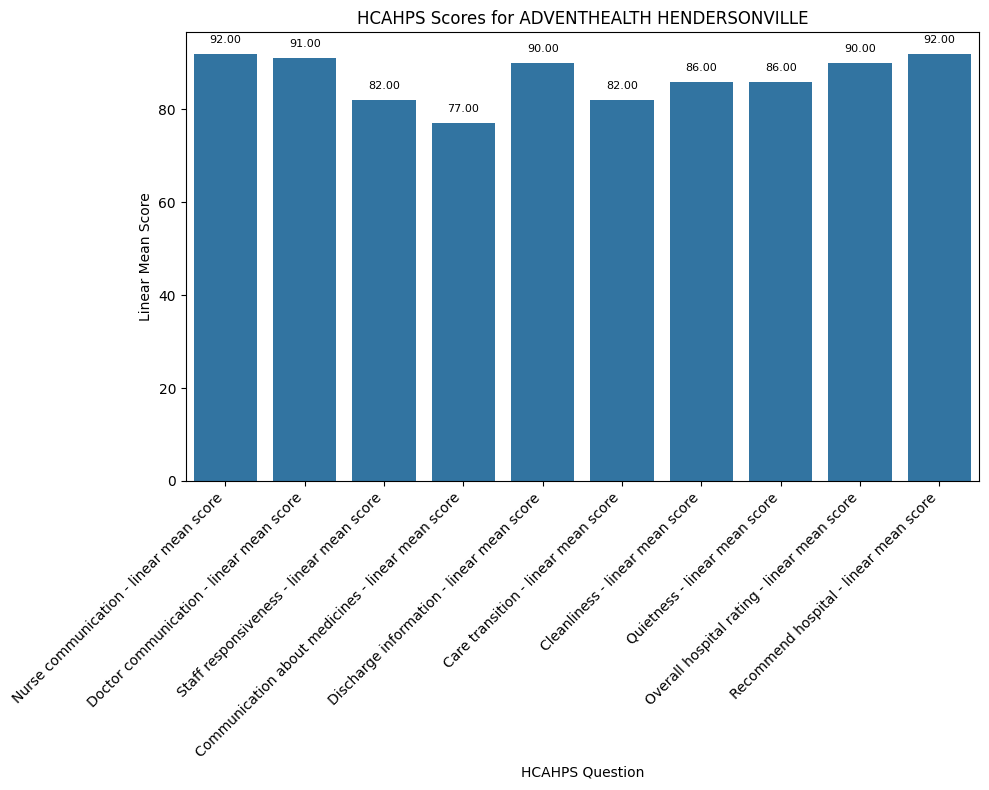

In [ ]:


# Scores for AdventHealth
scores = {
    'Facility Name': 'ADVENTHEALTH HENDERSONVILLE',
    'Nurse communication - linear mean score': 92,
    'Doctor communication - linear mean score': 91,
    'Staff responsiveness - linear mean score': 82,
    'Communication about medicines - linear mean score': 77,
    'Discharge information - linear mean score': 90,
    'Care transition - linear mean score': 82,
    'Cleanliness - linear mean score': 86,
    'Quietness - linear mean score' : 86,
    'Overall hospital rating - linear mean score': 90,
    'Recommend hospital - linear mean score': 92
}

# Create a DataFrame from the scores dictionary
advent_health_scores = pd.DataFrame([scores])

# Melt the DataFrame to reshape it for visualization
melted_scores = pd.melt(advent_health_scores, id_vars=['Facility Name'], var_name='HCAHPS Question', value_name='HCAHPS Linear Mean Value')

# Plotting the bar graph for AdventHealth scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='HCAHPS Question', y='HCAHPS Linear Mean Value', data=melted_scores)
plt.title(f'HCAHPS Scores for {advent_health_scores["Facility Name"].iloc[0]}')
plt.xlabel('HCAHPS Question')
plt.ylabel('Linear Mean Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


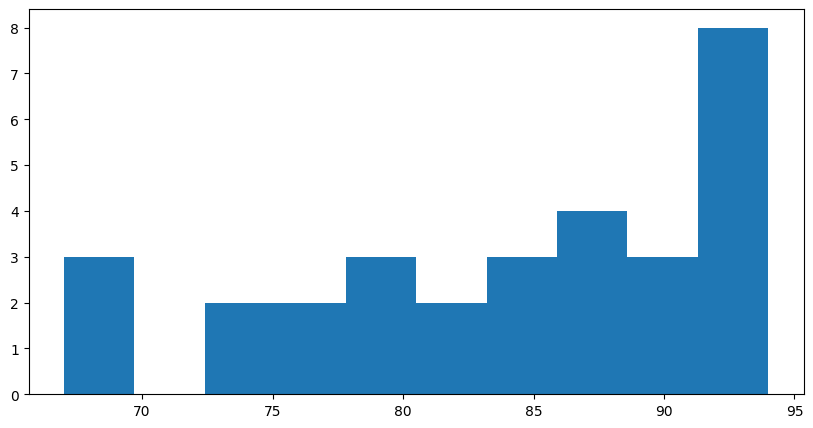

In [ ]:
#histogram test for normality for independent variable(linear mean value)
plt.figure(figsize=(10, 5))
# Using the correct column for the histogram
Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'].hist()
plt.grid(False)

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on the filtered data
stat, p = shapiro(Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'])

# Print results
print(f'Statistics={stat:.3f}, p={p:.3f}')

# Interpretation
if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")


Statistics=0.923, p=0.033
Data is not normally distributed (reject H0).


In [ ]:
# box cox transformation
from scipy.stats import boxcox
Hospital_Recommended_Score_df['BoxCox_Transformed'], _ = boxcox(Hospital_Recommended_Score_df['HCAHPS Linear Mean Value'])

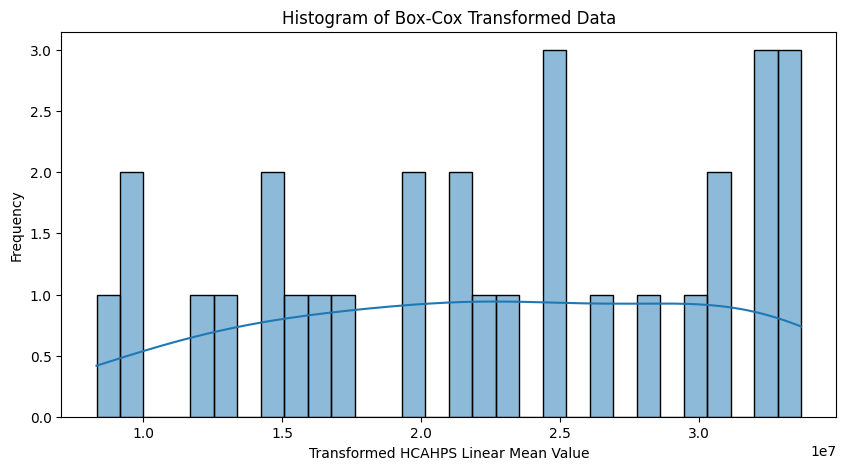

In [ ]:
# Histogram of Transformed Data
plt.figure(figsize=(10, 5))
sns.histplot(Hospital_Recommended_Score_df['BoxCox_Transformed'], bins=30, kde=True)
plt.title("Histogram of Box-Cox Transformed Data")
plt.xlabel("Transformed HCAHPS Linear Mean Value")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


In [ ]:
# Shapiro-Wilk Test for Normality
stat, p = shapiro(Hospital_Recommended_Score_df['BoxCox_Transformed'])

# Print results
print(f'Shapiro-Wilk Test Statistics: {stat:.3f}, p-value: {p:.3f}')

# Interpretation
if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test Statistics: 0.938, p-value: 0.082
Data appears to be normally distributed (fail to reject H0).


In [ ]:
# Group transformed data by Facility Name
hospital_groups = Hospital_Recommended_Score_df.groupby("Facility Name")["BoxCox_Transformed"].apply(list)

# Perform ANOVA on transformed data
# Assuming valid_hospitals contains the relevant data
f_statistic, p_value = f_oneway(*hospital_groups)  # Changed valid_hospitals to hospital_groups
print(f'F-statistic: {f_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

# Interpretation
if p_value < 0.05:
    print(" There is a significant difference in the means of the groups (reject H0).")
else:
    print("There is no significant difference in the means of the groups (fail to reject H0).")

F-statistic: 12.425
P-value: 0.000
 There is a significant difference in the means of the groups (reject H0).
